<h1>Лабораторная работа №1.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import pandas as pd
from tabulate import tabulate
data = {
    "Вариант": [24],
    "Параметры (a; σ²)": ["(0;16)"],
    "n": [120],
    "q": [2.3],
    "k": [5],
    "Правило для расчета числа интервалов группировки": ["Фридмана Диакониса"],
    "Закон распределения случайной величины Y": ["F-распределение с числом степеней свободы k1=6 и k2=5"]
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+
|   Вариант | Параметры (a; σ²)   |   n |   q |   k | Правило для расчета числа интервалов группировки   | Закон распределения случайной величины Y              |
|-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------|
|        24 | (0;16)              | 120 | 2.3 |   5 | Фридмана Диакониса                                 | F-распределение с числом степеней свободы k1=6 и k2=5 |
+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a; σ²)

In [5]:
#исходные данные задачи 
n=120
mu, sigma = 0,16 

In [7]:
# Генерация выборки
s = np.random.normal(mu, sigma, n)
print(s)

# Оценка среднего и стандартного отклонения
a_estimate = np.mean(s)  # Среднее
sigma_estimate = np.std(s, ddof=1)  # Стандартное отклонение с поправкой на степень свободы

# Печать оценок
print(f"Оценка среднего (a): {a_estimate}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate}")

# Дополнительный расчет стандартного отклонения вручную
sum_squared_diff = 0
for i in s:
    sum_squared_diff += (i - a_estimate) ** 2

# Вычисление стандартного отклонения вручную
manual_sigma = math.sqrt(sum_squared_diff / (n - 1))
print(f"Стандартное отклонение (вручную): {manual_sigma}")

Оценка среднего (a): 4.036213101867679
Оценка стандартного отклонения (σ): 16.13153006048807
Стандартное отклонение (вручную): 16.13153006048807


## 1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, Фридмана Диакониса. Вычислить средствами Python сумму абсолютных частот. Построить гистограмму абсолютных частот.

In [38]:
#Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот
k_bins=np.histogram_bin_edges(s,"fd")
print(len(k_bins))
count, bin_edges = np.histogram(s,k_bins)
### count содержит абсолютные частоты для каждого интервала
print(count)
print(bin_edges)
count1=np.sum(count)
count1

11
[ 2  2 12 16 23 22 25 10  5  3]
[-11.08948901  -8.98153576  -6.8735825   -4.76562925  -2.657676
  -0.54972274   1.55823051   3.66618376   5.77413702   7.88209027
   9.99004352]


120

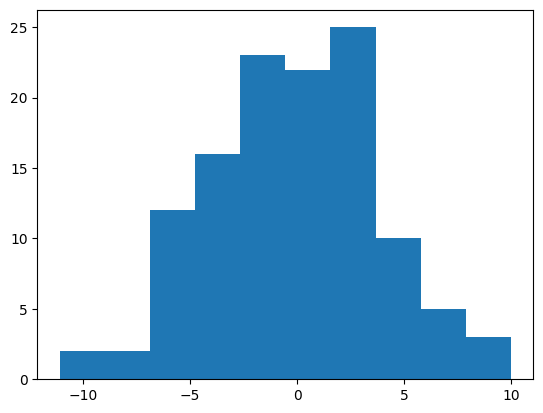

In [39]:
#Построить гистограмму абсолютных частот.
from scipy.stats import norm
count, bins, ignored  = plt.hist(s, k_bins)

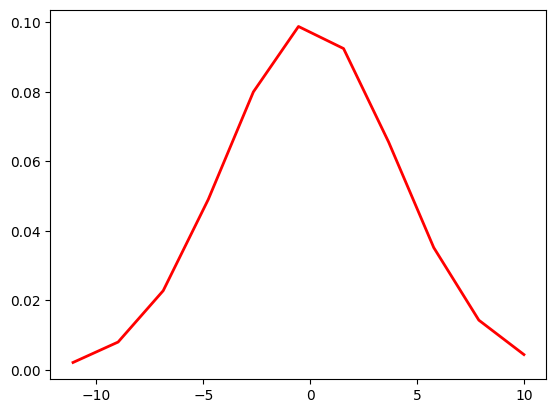

In [40]:
plt.plot(bin_edges, norm.pdf(bin_edges,0,4),linewidth=2, color='r')

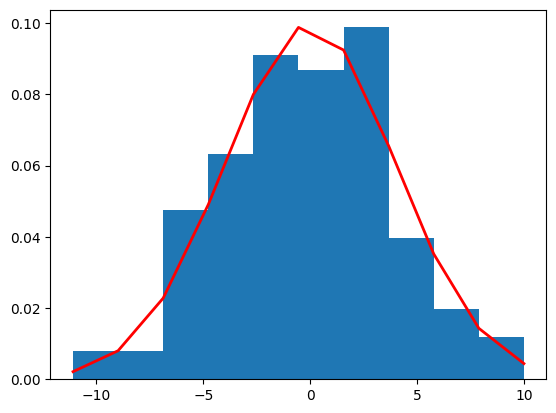

In [41]:
#Построить гистограмму относительных частот.
count, bins, ignored  = plt.hist(s, k_bins, density=True)
plt.plot(bin_edges, norm.pdf(bin_edges,0,4),linewidth=2, color='r')

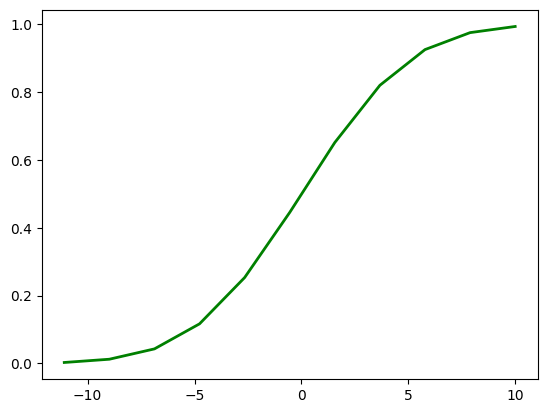

In [42]:
plt.plot(bin_edges, norm.cdf(bin_edges,0,4),linewidth=2, color='g')

In [ ]:
#Построить гистограмму относительных частот.
count, bins, ignored  = plt.hist(s, k_bins, density=True)
plt.plot(bin_edges, norm.(bin_edges,0,4),linewidth=2, color='r')